In [1]:
from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('df_clean.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.set_index('date', inplace=True)

In [3]:
df['moving_avg_7'] = df['price'].rolling(window=7).mean()
df['moving_avg_7'].fillna(df['moving_avg_7'].mean(), inplace=True)

In [4]:
# Split the data into train and test sets
train = df[:'01.05.2023 00:00']
test = df['01.05.2023 00:00':]
# difine the data into X and y
X_train = train.drop('price', axis=1)
y_train = train['price']
X_test = test.drop('price', axis=1)
y_test = test['price']

In [5]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

squared_diff = (y_pred - y_test) ** 2
    
# Calculate the mean squared error
mse = np.mean(squared_diff)
rmse = np.sqrt(mse)

print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 30.315015202499914


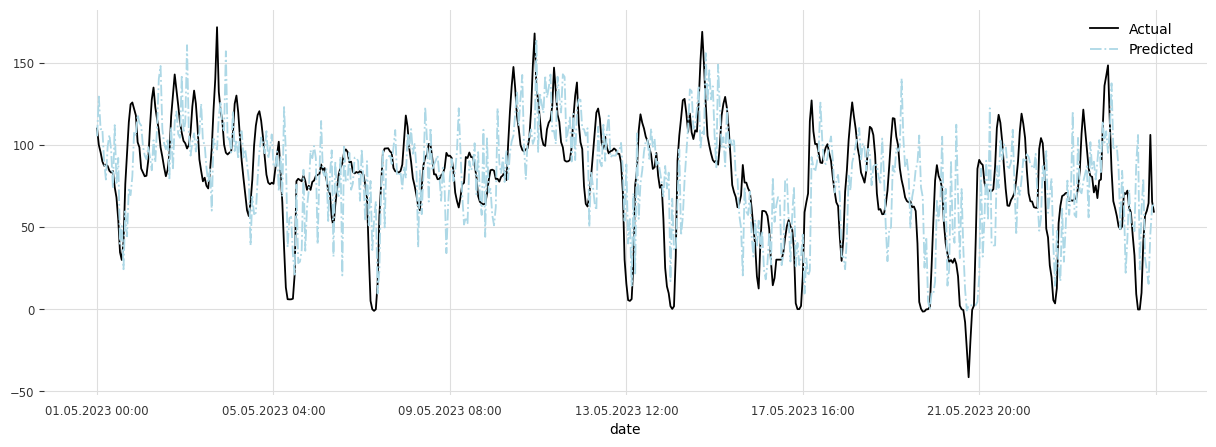

In [6]:
import matplotlib.pyplot as plt
y_pred_df = pd.DataFrame(y_pred, index=y_test.index, columns=['price'])

# Plot the actual and predicted prices
plt.figure(figsize=(15,5))
plot_params_actu = {'color': 'black'}
plot_params_pred = {'color': 'lightblue', 'linestyle': 'dashdot'}
ax = y_test.plot(**plot_params_actu)
ax = y_pred_df.plot(ax=ax, **plot_params_pred)
plt.legend(['Actual', 'Predicted'])
plt.show()